# Creating Presentable Visualizations With Matplotlib



Visualizations are an important tool for communicating data-driven insights. A strong insight paired with an appropriately formatted visauzliation often resonates with audiences far substantially more than raw data alone. The importance of visualizations is increased when communicating insights to stakeholders (e.g., executives, partners) beyond the data science community.

There are myriad routes to creating compelling visualizations with countless texts dedicated to it. Edward Tufte--the oft-cited author of "THe Visual Display of Quantitative Information"--opens his seminal text with the following advice: 

"Excellence in statistical graphics consists of complex ideas communicated with clarity, precision, and efficiency."

Tufte continues to list a number of guiding principles that support the ideal of presenting cmoplex ideas with clarity, precision, and efficiency. Tranlating Tufte's ideals to practice I use the following tactical list as a baseline checklist for creating presentable visualizations: 

**The data**
- Place data labels inline whenever possible (avoid legends)
- Match the data's color and label
- Ensure it is easy to compare across data sets (horitzontal bars > vertical bars)

**The axes**
- Label x and y axes with a description 
- Include units in the x and y axis tick labels
- Avoid non-zero y-axis minimums (or x-axis if horizontal bars)

**The figure**
- Adopt a descriptive title for the chart
- Create high color contrast to draw attention to the data
- Ensure the visualization can stand on its own

A quick note on the final rule which reccomends creating visualizations that can stand on their own. What I mean by this is that <em>a twitter user who sees nothing more than a screenshot of the visualization should be able to correctly interpret the visualization</em>. I recently added this based on the now infamous misleading pie chart which went viral. That episode reinforces the importance of every visualization containing all the context and information that needed. Given today's culture of screeenshotting, we must accept that it is more than likely that the majority of our audience may only see our visualizaiton (separated from the explanatory text).

Given this preamble, in the rest of this essay I will walkthrough my process for delivering on these visualization rules with: Python, Pandas, and Matplotlib.

My current perspective is that creating visualizations with pure Matplotlib and not relying upon additional libraries (e.g., Seaborn, Altair) is an excellent starting point for producing basic visualizations (e.g., bar, scatter, and line charts). Moreover, many visualization libraries are built-upon Matplotlib so fluency in Matplotlib is essential. 

## Preparing our data for visualization

In this article, I will utilize a fun dataset provided by FiveThirtyEight which contains data related to the guests who appeared on John Stewart's long-running "Daily Show" on Comedy Central. 

The below code simply imports the needed libraries and uses Pandas to import the dataset and store it as a DataFrame.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

## Establishing a Baseline Visualization
Whenever I begin a visualization effort, my first goal is to produce a 'minimum viable visualization'. As we will quickly find out perfecting a visualization can be a time-consuming (and verbose) process, before investing our time we want to make sure the visualization is going to 'work' (everything from our data is formatted correctly to the chosen chart communicates the insight effectively). 

To create our 'minimum viable visualization' we rely upon Pandas built-in plotting functionality. In the below example, we form a series object which contains the top 10 guests (by appearances) as the index and the count of each of the top guest's appearances as the values. 

In [4]:
top_guests = df['Guest'].value_counts(ascending=False)[:10]

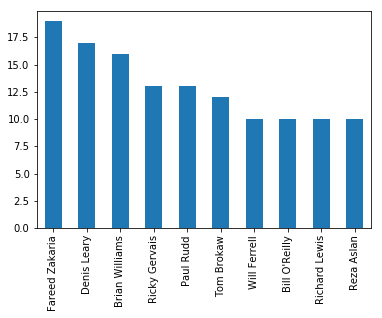

In [5]:
top_guests.plot.bar();

With a little help from Matplotlib we quickly achieve a minimum viable visualization: 

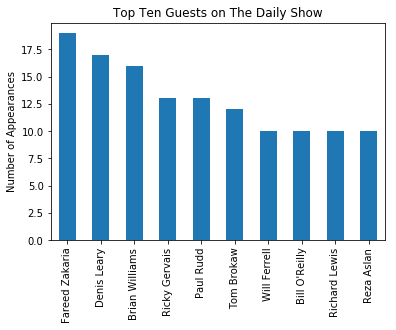

In [7]:
top_guests.plot.bar()
plt.title('Top Ten Guests on The Daily Show')
plt.ylabel('Number of Appearances')
plt.show()

Not Bad! With a few lines of code we have a minimum viable visualization. If this was an exploratory analysis it may be okay to stop right now; however, the title of this essay promises a presentable visualization so let's push onward...

## Building a Presentable Visualization

Now that we have confirmed that our minimum viable visualization is worthy of investing the time needed to make it presentable, we can proceed: 

### The Figure

As a starting point, we need to set intial visual and parameter settings for our visualization. Based on the rules discussed earlier our figure should: 

- Adopt a descriptive title for the chart
- Create high color contrast to draw attention to the data
- Ensure the visualization can stand on its own

We can add a descriptive title and adopt a high contrast style relatively easily with the below code. Ensuring our visualization can stand on its own will be a result of all our visualization steps. 

The code below will initialize our figure and set some basic elements: figure size, gridelines, and title.

In [ ]:
#Set plot style
plt.style.use('fivethirtyeight')

#Adjust figure size
fig, ax = plt.subplots(figsize=(7.25,7.25))

# Adjust color of gridlines
ax.grid(alpha=0.7, linewidth=1.25)

#Add title
ax.text(x=-4,
        y=10.25, 
        s="Who Gets Invited Back On The 'The Daily Show'?",
        fontsize=18,
        fontweight='bold')
ax.text(x=-4,
        y=9.75, 
        s="Top ten recurring guests, by all time appearances",
        fontsize=15,
        fontweight='normal')

### The Data

At this point it is helpful to recall the three rules for presentable data: 
- Place data labels inline whenever possible (avoid legends)
- Match the data's color and label (if applicable)
- Ensure it is easy to compare across data sets (horitzontal bars > vertical bars)

In this situation we don't need a legend; however, we should still add data labels that contain the total number of appearances for each guest. Rather than the color and label explicitly in this example we will position the label within each bar to help the viewer link each label to the appropriate bar. Finally, we will create the visual to have horizontal rather than vertical bars. In my opinoin, doing so increases comparability across samples and makes the text labels more legible. 

The below code accomplishes all three of these goals:

In [ ]:
#Create horizontal bar chart
top_guests.plot.barh(ax=ax, 
                     color='#1d8ed2')

# Add labels to bars
for i, v in enumerate(top_guests):
    ax.text(v - 1, i-0.075, str(v), color='white', fontweight='bold')

### The axes

As a reminder, our rules for the axes are:
- Label x and y axes with a description
- Include units in the x and y axis tick labels
- Avoid non-zero y-axis minimums (or x-axis if horizontal bars)

In this situation, I feel the y-axis is relatively self-evident based on our titling; however, a label on the x-axis is definitely necessary. Further, we should adjust the x-axis to display only whole numbers (fractions don't make sense in this context).

These adjustments can be made as follows: 

In [ ]:
#Set location of x-axis ticks
ax.set(xticks=[0, 5, 10, 15, 20]
      )

#Set x-axis tick labels (not strictly neccesary in this case)
ax.set_xticklabels( ["0", "5", "10", "15", "20"] )

#Set x-axis label
ax.set_xlabel('Number of Appearances', fontsize=13)

#Set font-size of axes
ax.tick_params(axis='both', labelsize=13)

### Bringing it all together

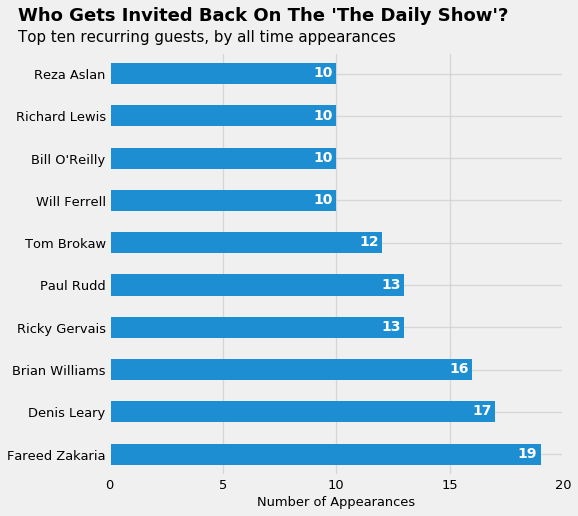

In [8]:
# Figure

#Set plot style
plt.style.use('fivethirtyeight')

#Adjust figure size
fig, ax = plt.subplots(figsize=(7.25,7.25))

# Adjust color of gridlines
ax.grid(alpha=0.7, linewidth=1.25)

#Add title
ax.text(x=-4,
        y=10.25, 
        s="Who Gets Invited Back On The 'The Daily Show'?",
        fontsize=18,
        fontweight='bold')
ax.text(x=-4,
        y=9.75, 
        s="Top ten recurring guests, by all time appearances",
        fontsize=15,
        fontweight='normal')

# Data

#Create bar chart
top_guests.plot.barh(ax=ax, 
                     color='#1d8ed2')

# Add labels to bars
for i, v in enumerate(top_guests):
    ax.text(v - 1, i-0.075, str(v), color='white', fontweight='bold')

# Axes

#Set location of x-axis ticks
ax.set(xticks=[0, 5, 10, 15, 20]
      )

#Set x-axis tick labels (not strictly neccesary in this case)
ax.set_xticklabels( ["0", "5", "10", "15", "20"] )

#Set x-axis label
ax.set_xlabel('Number of Appearances', fontsize=13)

#Set font-size of axes
ax.tick_params(axis='both', labelsize=13)

# Show plot without extra output
plt.show()